# Some Plots Used For Data Visualization

This notebook goes over some of the plots used for data visualization through some complex examples that explores some of the available customization.

We'll mostly be working with the a dataset pertaining to the immigration flow to Canada from all other countries.
- The original dataset can be found on the UN's website: https://www.un.org/development/desa/pd/data/international-migration-flows.
- The modified dataset by IBM can be found here: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx.
  - Do note that this Excel file has multiple tabs.

### Table of Contents:

- [0. Prerequisites](#0.-Prerequisites)
- [1. Setting Up Data Set](#1.-Setting-Up-Data-Set)
  - [1.1 Importing Raw Data Set](#1.1-Importing-Raw-Data-Set)
  - [1.2 Cleaning & Saving the Data](#1.2-Cleaning-&-Saving-the-Data)
  - [1.3 Importing the Cleaned Data](#1.3-Importing-the-Cleaned-Data)
- [2. Built-In Plots on DataFrame](#2.-Built-In-Plots-on-DataFrame)
  - [2.1 Line Plots](#2.1-Line-Plots)
  - [2.2 Area Plots](#2.2-Area-Plots)
  - [2.3 Histograms](#2.3-Histograms)
  - [2.4 Bar Charts](#2.4-Bar-Charts)
  - [2.5 Pie Charts](#2.5-Pie-Charts)
  - [2.6 Box Plots](#2.6-Box-Plots)
  - [2.7 Scatter Plots](#2.7-Scatter-Plots)
  - [2.8 Bubble Plots](#2.8-Bubble-Plots)
- [3. Waffle Charts & Word Clouds](#3.-Waffle-Charts-&-Word-Clouds)
- [4. Seaborn & Regression Plot](#4.-Seaborn-&-Regression-Plot)
- [5. Folium](#5.-Folium)
  - [5.1 Map Markers with Police Department Incidents Data Set](#5.1-Map-Markers-with-Police-Department-Incidents-Data-Set)
  - [5.2 Choropleth Maps](#5.2-Choropleth-Maps)


<hr />

# 0. Prerequisites

Before you run this notebook, complete the following steps:
- Install Libraries/Packages
- Import Required Modules


### Install Libraries/Packages

This will install all of the libraries/packages used in all of the notebooks for this project.

In [ ]:
! pip install folium matplotlib numpy pandas pywaffle seaborn wordcloud

### Import Required Modules

Import and configure the required modules.

In [2]:
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pywaffle import Waffle
from wordcloud import WordCloud

# Update global plot style.
mpl.style.use(['ggplot']) 

# 1. Setting Up Data Set

All the sections below except for `1.3` can be skipped if they've been done before.

### 1.1 Importing Raw Data Set

We start off by reading the raw dataset, displaying the first 5 rows.

In [3]:
# Data from: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx
file_path = "./Canada.xlsx"

df_can = pd.read_excel(
    file_path,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
  )
# Display the first 5 rows.
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### 1.2 Cleaning & Saving the Data

We have a couple of tasks when cleaning the data:
- Removing unuseful data.
- Renaming columns to be more clear.
- Set the index to be the country name.
- Adding a new `Total` column containing the total number of immigrants that migrated from a given country to Canada from 1980 to 2013.

In [4]:
# Drop unused columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
# Rename columns.
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
# Create new `Total` variable indicating the total number of immigrants that immigrated over the years.
df_can["Total"] = df_can.sum(axis=1, numeric_only=True)
# Replace the index used with the `Country`.
df_can.set_index("Country", inplace=True)
df_can.index.name = None

# Save Data
df_can.to_csv("./Canada_cleaned.csv")

### 1.3 Importing the Cleaned Data

After doing our data cleaning, we can import the cleaned dataset. In addition, we'll also do the following:
- Ensure all column names are strings (this is to prevent confusion when accessing a year column since it looks like index notation).
- Create a `years` variable containing the list year (strings) from 1980 to 2013. This can be used later on for only selecting the years in the dataframe.
- Sort the rows by the `Total` column in descending order.

In [5]:
# Import cleaned data.
df_can = pd.read_csv("./Canada_cleaned.csv", index_col=0)

# Stringify columns to prevent confusion when accessing.
df_can.columns = list(map(str, df_can.columns))

# Sort rows by total number of immigrants.
df_can.sort_values(by="Total", ascending=False, inplace=True)

# Useful constants
years = list(map(str, range(1980, 2014)))

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


# 2. Built-In Plots on DataFrame

The Dataframes generated by Panadas has built-in support for plots which are usually sufficient for the task.

### 2.1 Line Plots

Line plots display (continuous) information through a series of points connected by straight lines.

For example, we can display the immigration trend from the top 5 countries from 1980 - 2013.

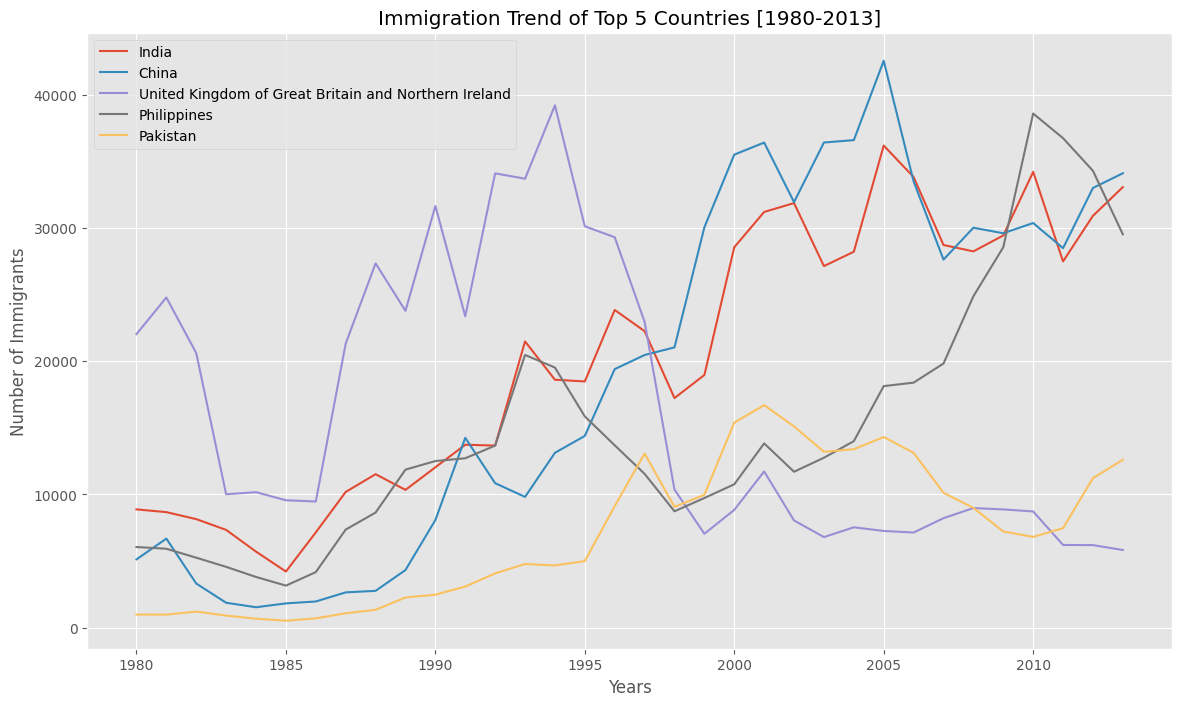

In [6]:
# Get the 5 countries that contributed the most immigrants to Canada.
df_top5 = df_can.head(5)
# Make the year be on the x-axis.
df_top5 = df_top5[years].transpose()
# Ensure x-axis (years) is in integer format.
df_top5.index = df_top5.index.map(int)

# Create line plot.
df_top5.plot(kind="line", figsize=(14,8))

plt.title("Immigration Trend of Top 5 Countries [1980-2013]")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.show()

### 2.2 Area Plots

Area plots are similar to line plots, except the area underneath of the line is used to indicated magnitude & proportion.

By default, area plots are stacked, however, you can disable this behavior and make it look like a line plot.

We'll plot the previous example in an area plot. To spice things up, we'll add the chart elements by using the returned axis object.

Text(0, 0.5, 'Number of Immigrants')

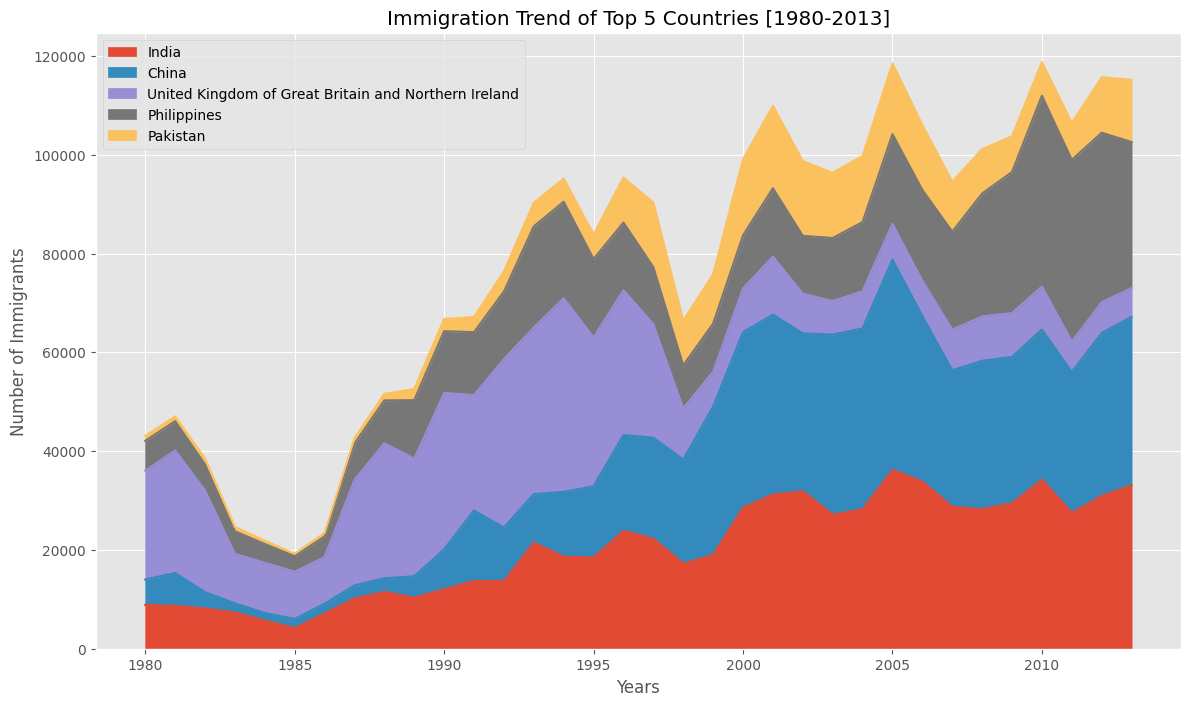

In [7]:
# Create area plot.
ax = df_top5.plot(kind="area",
                  # stacked=False, # To disable stacking behavior.
                  figsize=(14,8),
                  # alpha=0.25, # Customize the opacity of the area.
                  )

ax.set_title("Immigration Trend of Top 5 Countries [1980-2013]")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

### 2.3 Histograms

Histograms are a way of representing the *frequency* distribution of numeric dataset (ie: through grouping the data in bins). The y-axis represents the frequency of the bins/partitions represented by the x-axis.

For example, we can display a histogram for the distribution of immigrants from Denmark, Norway, and Sweden from 1980 - 2013.

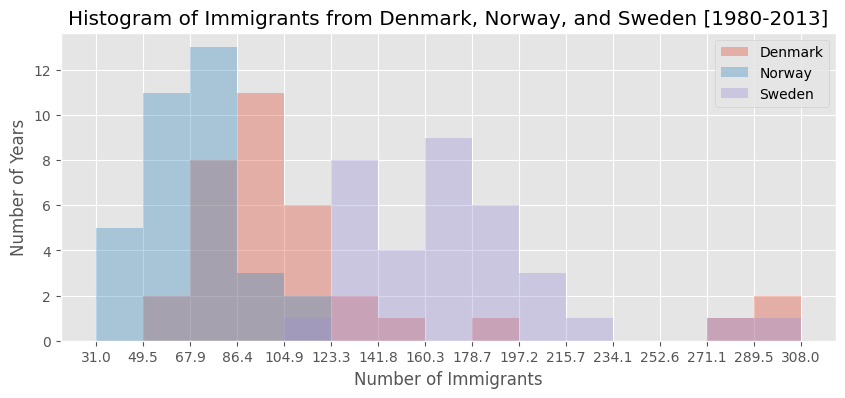

In [8]:
# Get the number of immigrants from Denmark, Norway, and Sweden for each year.
df_dns = df_can.loc[["Denmark", "Norway", "Sweden"], years].transpose()

num_bins = 15
# Get more accurate values representing the edges of the bin for the plot.
hist, bin_edges = np.histogram(df_dns, bins=num_bins)

# Create histogram.
df_dns.plot.hist(bins=num_bins, xticks=bin_edges, figsize=(10,4), alpha=0.35)

plt.title("Histogram of Immigrants from Denmark, Norway, and Sweden [1980-2013]")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Years")

plt.show()

### 2.4 Bar Charts

Bar charts are a way of representing data where the length of the bar represents the magnitude/size of the feature/variable.

For example, we can display a horizontal bar chart representing the top 15 countries contributing to immigration to Canada from 1980-2013.

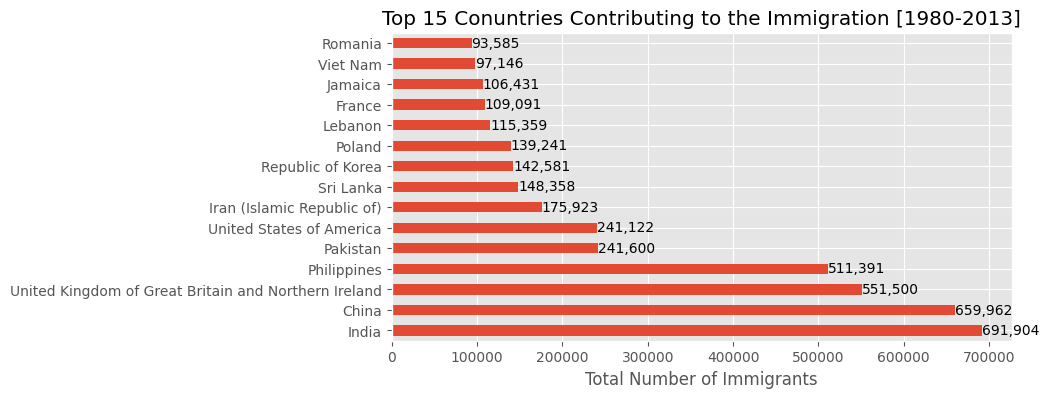

In [9]:
# Get the 15 countries that contributed the most immigrants to Canada.
df_top15 = df_can.head(15)
df_top15 = df_top15["Total"].transpose()

# Create horizontal bar chart.
df_top15.plot.barh(figsize=(8,4))
plt.title("Top 15 Conuntries Contributing to the Immigration [1980-2013]")
plt.xlabel("Total Number of Immigrants")

# Annotate immigration population next to bar.
for idx, total in enumerate(df_top15):
  plt.annotate(f"{format(int(total), ",")}", xy=(total, idx), va="center", ha="left")

plt.show()

### 2.5 Pie Charts

Pie charts displays numeric proportions inside a circle. This type of graph shouldn't be used as the data isn't presented in an easy-to-understand fashion, with bar charts performing the task better.

For example, we can display the proportion of new immigrants grouped by continents from 1980 - 2013.

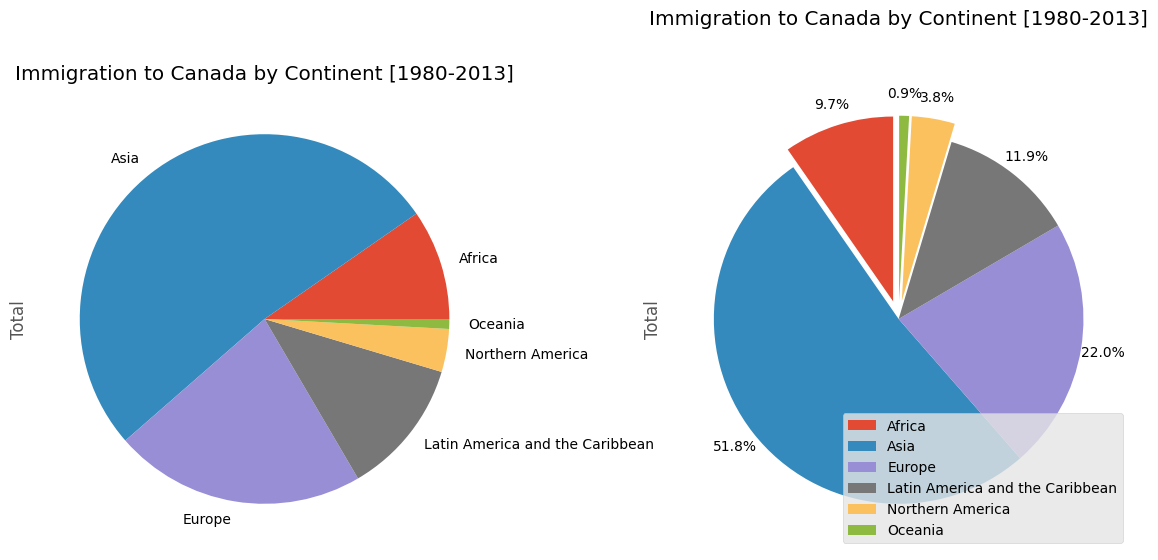

In [10]:
# Divide figure into 2 subplots (1 row, 2 columns).
# Can be done with: `fig, axs = plt.subplots(ncols=2)`
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # First subplot
ax1 = fig.add_subplot(1, 2, 2) # Second subplot

# Group the data by continents.
df_continents = df_can.groupby("Continent").sum()
df_continents.drop(columns=["Region", "DevName"], inplace=True)

# Create pie chart.
df_continents["Total"].plot.pie(figsize=(15,4), ax=ax0)

ax0.set_title("Immigration to Canada by Continent [1980-2013]")

# Create more stylized pie chart.
df_continents["Total"].plot.pie(
  labels=None,  # Hide the continent labels next to the slice.
  autopct="%1.1f%%", # Display percentages on slices.
  # The ratio between the center of each pie slice and the start of the
  # text generated from `autopct`.
  pctdistance=1.12,
  # Detach `Africa`, `Oceania`, and `Northern America` from the pie a bit.
  explode=[0.1, 0, 0, 0, 0.1, 0.1],
  startangle=90,  # Rotate the chart 90° to have `Africa` on the top.
  figsize=(15,6),
  ax=ax1,
  )

ax1.set_title("Immigration to Canada by Continent [1980-2013]", y=1.12)
ax1.legend(labels=df_continents.index, loc="lower right") # Add separate legend.

### 2.6 Box Plots

Box plots are a way of statistically representing the distribution of data through 5 primary dimensions:
1. **Minimum:** Smallest number in the sorted data.
2. **First Quartile:** Point 25% the way through the sorted data.
3. **Median:** Point 50% the way through the sorted data.
4. **Third Quartile:** Point 75% the way through the sorted data.
5. **Maximum:** Highest number in the sorted data.

**Outliers** are seen as dots beyond the minimum & maximum.

For example, we could display the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

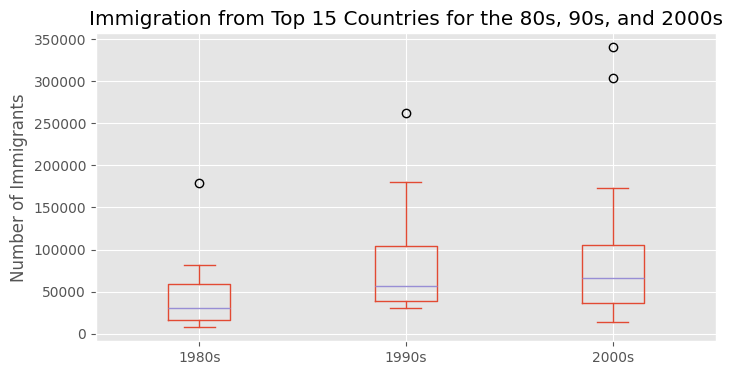

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


In [11]:
# Reset `df_top15` variable.
df_top15 = df_can.head(15)

# Get the list of years for each decade.
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

# Create series for each decade which we sum the immigration for each country.
df_80s = df_top15[years_80s].transpose().sum()
df_90s = df_top15[years_90s].transpose().sum()
df_00s = df_top15.loc[:, years_00s].sum(axis=1) # Alternative method of doing this.

# Create dataframe containing data for the specified decades.
df_decs = pd.DataFrame({ "1980s": df_80s, "1990s": df_90s, "2000s": df_00s })

# Create box plots.
df_decs.plot.box(figsize=(8,4))

plt.title("Immigration from Top 15 Countries for the 80s, 90s, and 2000s")
plt.ylabel("Number of Immigrants")

plt.show()

# Get the actual percentiles associated with both countries.
df_decs.describe()


### 2.7 Scatter Plots

Scatter plots (2D) are useful for comparing variables (ie: an independent variable vs a dependent variable) against each other to express a trend (ie: determine if correlation exists).

For example, we can display the total immigration from Denmark, Norway, and Sweden from 1980 - 2013.

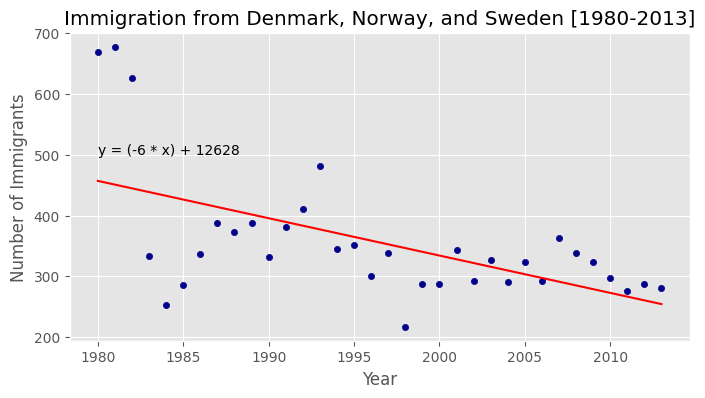

'No. Immigrants = (-6 * Year) + 12628'

In [12]:
# Create dataframe representing the total immigration from Denmark, Norway,
# and Sweden for each year.
df_dns_total = pd.DataFrame(df_dns.sum(axis=1))
df_dns_total.reset_index(inplace=True)
df_dns_total.columns = ["year", "total"]
df_dns_total["year"] = df_dns_total["year"].astype(int)

# Get linear function representing regression line for plot.
x = df_dns_total["year"]
y = df_dns_total["total"]
fit = np.polyfit(x, y, deg=1)

# Create scatter plot.
df_dns_total.plot.scatter(x="year", y="total", figsize=(8,4), color="darkblue")

plt.title("Immigration from Denmark, Norway, and Sweden [1980-2013]")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

# Plot the line of best fit.
plt.plot(x, fit[0] * x + fit[1], color="red")
plt.annotate("y = ({0:.0f} * x) + {1:.0f}".format(fit[0], fit[1]), xy=(1980,500))

plt.show()

"No. Immigrants = ({0:.0f} * Year) + {1:.0f}".format(fit[0], fit[1])

### 2.8 Bubble Plots

Bubble plots are a variation of scatter plots that display 3 dimensions of data. The data points are replaced wit "bubbles", with the bubble size determined by the 3rd variable which is the **weight**.

For example, we can display the immigration from China and India from 1980 - 2013.

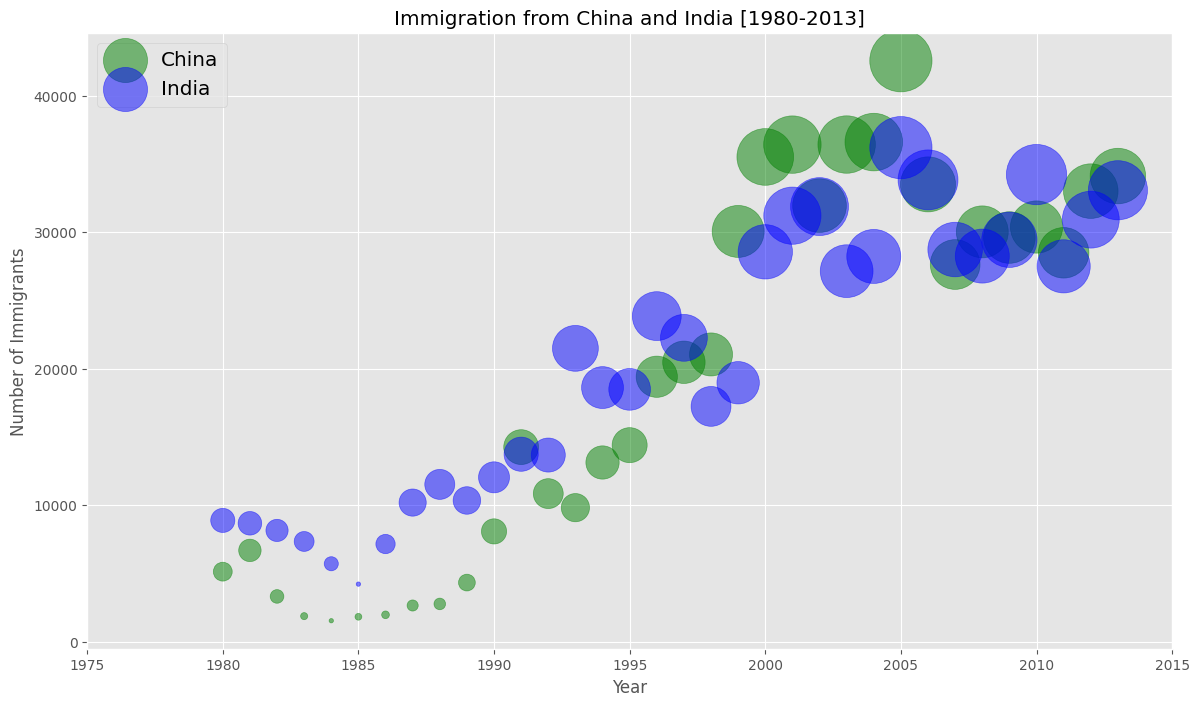

In [13]:
# Create a transposed version of our dataset.
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = "Year"
df_can_t.reset_index(inplace=True)

# Normalize the data.
norm_china = (df_can_t["China"] - df_can_t["China"].min()) / (df_can_t["China"].max() - df_can_t["China"].min())
norm_india = (df_can_t["India"] - df_can_t["India"].min()) / (df_can_t["India"].max() - df_can_t["India"].min())

# Create bubble plots.
ax0 = df_can_t.plot.scatter(x="Year",
                            xlim=(1975,2015),
                            y="China",
                            s=norm_china * 2000 + 10, # The weight.
                            figsize=(14,8),
                            alpha=0.5,
                            color="green",
                            )
ax1 = df_can_t.plot.scatter(x="Year",
                            y="India",
                            s=norm_india * 2000 + 10, # The weight.
                            alpha=0.5,
                            color="blue",
                            ax=ax0,
                            )

ax0.set_title("Immigration from China and India [1980-2013]")
ax0.set_ylabel("Number of Immigrants")
ax0.legend(["China", "India"], loc="upper left", fontsize="x-large")

# 3. Waffle Charts & Word Clouds

Waffle charts are a visualization technique representing categorical data in the form of square tiles or cells, with each tile representing a specific value or category. The size of the square indicates the magnitude or proportion of each category.

Word clouds display textual data in a visually engaging and informative manner, giving an overview of the most commonly used words. THe bigger & bolder the word, the more frequent the word appears.

These 2 charts can't be implemented easily with the default Matplotlib library. Luckily, there's librarise to help create these charts:
- [`pywaffle`](https://pywaffle.readthedocs.io/en/latest/) is a library to create waffle charts.
- [`wordcloud`](https://pypi.org/project/wordcloud/) is a library to create word clouds.

### Waffle Charts

For example, we can display a waffle chart for the distribution of immigrants from Denmark, Norway, and Sweden from 1980 - 2013.

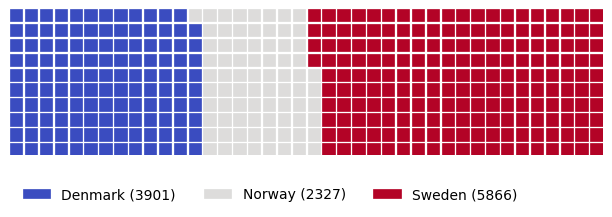

In [14]:
# Waffle Dimensions
width = 40
height = 10
total_num_tiles = width * height

# Calculate the proportions & tile distribution.
df_dns_waffle = df_can.loc[["Denmark", "Norway", "Sweden"], "Total"].to_frame()
df_dns_waffle.index.name = "Country"
waffle_prop = df_dns_waffle["Total"] / df_dns_waffle["Total"].sum()

waffle_dist = pd.DataFrame({ "Number of Tiles": (waffle_prop * total_num_tiles).round().astype(int) })
waffle_data = waffle_dist["Number of Tiles"]

# Create waffle chart.
plt.figure(
  FigureClass=Waffle,
  rows=height,
  columns=width,
  values=waffle_data,
  labels=[f"{k} ({df_dns_waffle.loc[k, "Total"]})" for k, _ in waffle_data.items()],
  legend={"loc": "lower left", "bbox_to_anchor": (0, -0.4), "ncol": 3, "framealpha": 0 },
  colors=["#3A4CC0", "#DDDCDB", "#B30326"],
)

plt.show()

### Word Clouds

For example, we can display a word cloud based on the total immigration from each country.

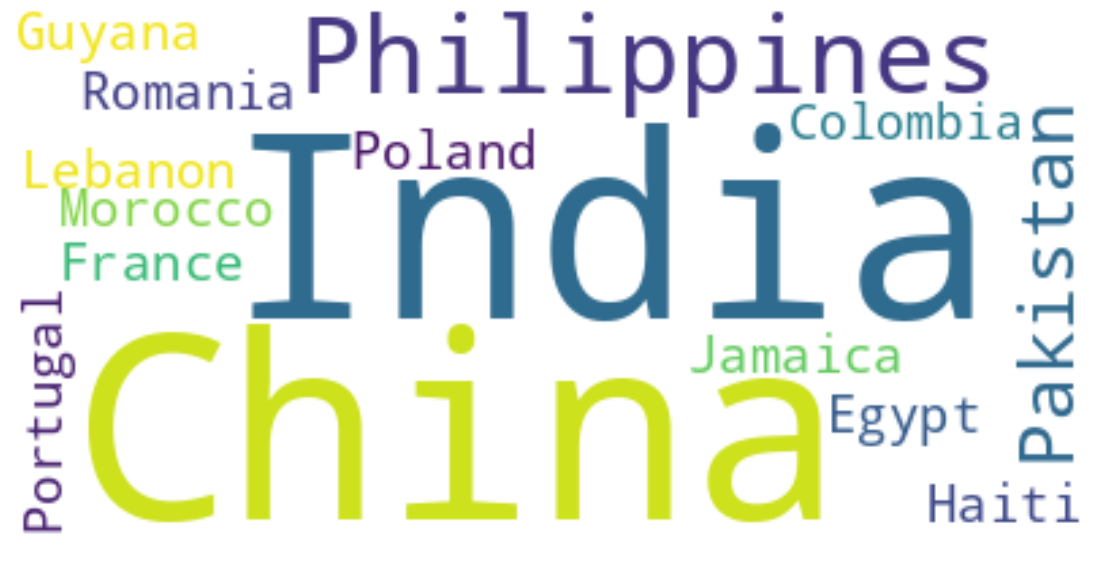

In [15]:
# Generate a custom word string based on the percentage of immigrants from each country.
total_immigration = df_can["Total"].sum()

max_words = 90
word_str = ""
for country in df_can.index.values:
  # Check if the country's name is a single word-name
  if (country.count(" ")) == 0:
    repeat_num_times = int(df_can.loc[country, "Total"] / total_immigration * max_words)
    word_str = word_str + ((country + " ") * repeat_num_times)

# Create the word cloud.
wordcloud = WordCloud(background_color="white",
                      # Typically, there's some meaningless words that we should
                      # remove; these are the stopwords. `wordcloud` exports
                      # `STOPWORDS` which is a default set of stopwords we can use.
                      # stopwords=set(STOPWORDS)
                      ).generate(word_str)

plt.figure(figsize=(14,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


# 4. Seaborn & Regression Plot

Seaborn is a Python visualizaiton library based on Matplotlib and provides an interface for making plots easier.

The main advantage of using Seaborn in the context of regression plots is that we don't need to write the code to plot the regression line; Seaborn will automatically insert one.

For example, we can display the total immigration from Denmark, Norway, and Sweden from 1980 - 2013.

   year  total
0  1980    669
1  1981    678
2  1982    627
3  1983    333
4  1984    252


[]

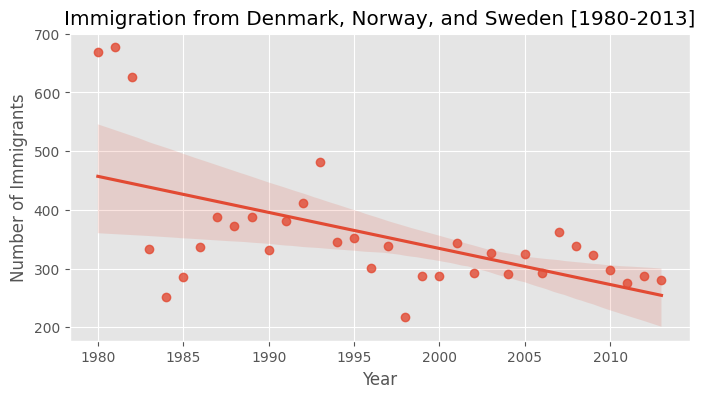

In [16]:
# Let's reuse the `df_dns_total` variable created from the example for the
# scatter plot.
print(df_dns_total.head())

# Create regression plot.
fig, ax = plt.subplots(figsize=(8,4))
sns.regplot(x="year", y="total", data=df_dns_total, ax=ax)

plt.title("Immigration from Denmark, Norway, and Sweden [1980-2013]")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.plot()

# 5. Folium

Folium is a data visualization library used to visualize geospatial data (ie: geographic maps, stree-level maps, etc.) and provides interactivity (ie: zoom). You can provide information such as longitude & latitude coordinates to position the initial viewing location on the map.

Folium uses "tiles" to determine the visual feel of the map (think of it as themes). You can find the list of built-in tiles here: https://python-visualization.github.io/folium/latest/user_guide/raster_layers/tiles.html.

We'll start off with the most basic of maps which positions the initial viewing location to Canada and uses a different tileset.

In [17]:
# Create a "Cartodb Positron" map of the world centered around Canada.
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles="Cartodb Positron")

# Display map.
world_map

### 5.1 Map Markers with Police Department Incidents Data Set

To show more of the features of Folium, we'll work with a different data set.
- The dataset provided by IBM can be found here: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv.

We'll start off by limiting the data to the first 100 rows since there are 150,500 entries. Then, we'll view the first 5 rows of the data set.

In [18]:
limit = 100

df_incidents = pd.read_csv("./Police_Dep_Inccidents.csv")
df_incidents = df_incidents.iloc[0:limit, :]
# Display the first 5 rows.
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Now, we'll indicate the incidents on the map indicating where the crimes took place by using Folium's markers features.

In [19]:
# San Francisco location.
sf_loc = [37.77, -122.42]

# Data specifications.
lats = df_incidents.Y
lngs = df_incidents.X
inc_cat = df_incidents.Category

# Create the map.
sanfran_map = folium.Map(location=sf_loc, zoom_start=12)

# Plot the markers.
incidents_feat_group = folium.map.FeatureGroup()

# Loop through the crimes and add a marker for each incident in the feature group.
for lat, lng in zip(lats, lngs):
  incidents_feat_group.add_child(
    folium.features.CircleMarker(
      [lat, lng],
      radius=5, # How big the circle marker to be.
      color="yellow",
      fill=True,
      fill_color="blue",
      fill_opacity=0.6,
    )
  )

# Add popup text to each marker.
for lat, lng, label in zip(lats, lngs, inc_cat):
  folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# Add incidents to map.
sanfran_map.add_child(incidents_feat_group)

Since the map looks congested with this current implementation, we can apply the pop-up behavior indicating the type of incident on the minimal-looking markers.

In [20]:
# Re-create the map.
sanfran_map = folium.Map(location=sf_loc, zoom_start=12)

# Loop through the crimes and add a marker for each incident on the map.
for lat, lng, label in zip(lats, lngs, inc_cat):
  folium.features.CircleMarker(
    [lat, lng],
    radius=5, # How big the circle marker to be.
    color="yellow",
    fill=True,
    fill_color="blue",
    fill_opacity=0.6,
    popup=label,
  ).add_to(sanfran_map)

# Display map.
sanfran_map

What if we liked the location markers but not the clutter it creates? We can use a MarkerCluster object from the provided plugins and add the markers to that. What this MarkerCluster object do is that it'll group closely positioned marker and display a big marker with the number of markers in that area.

In [21]:
from folium import plugins

# Create the map.
sanfran_map = folium.Map(location=sf_loc, zoom_start=12)

# Plot the markers.
incidents_marker_cluster = plugins.MarkerCluster().add_to(sanfran_map)

# Loop through the crimes and add a marker for each incident in the marker cluster.
for lat, lng, label in zip(lats, lngs, inc_cat):
  folium.Marker(location=[lat, lng], icon=None, popup=label) \
    .add_to(incidents_marker_cluster)

# Display map.
sanfran_map

### 5.2 Choropleth Maps

Choropleth maps is a thematic map where areas are shaded or patterned in proportion to the measurement of the statistical variable displayed on the map.

This requires us to provide a GeoJSON file that defines the areas/boundaries of the state, county, or country we're interested in.
- We can get the file here: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

In [22]:
import json

with open("./world_countries.json") as f:
  world_geo = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './world_countries.json'

Now we can create the choropleth map displaying the total immigration of each country to Canada from 1980 - 2013.

In [432]:
# Create the map.
world_map = folium.Map(location=[0, 0], zoom_start=2)

df_can_choropleth = df_can.reset_index()
df_can_choropleth.rename(columns={ "index": "Country" }, inplace=True)

# Generate choropleth map and add it to the world map.
folium.Choropleth(
    geo_data=world_geo,
    data=df_can_choropleth,
    columns=["Country", "Total"],
    key_on="feature.properties.name",
    fill_color="YlOrRd", 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name="Immigration to Canada"
).add_to(world_map)

# Display map.
world_map